In [ ]:
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/hinhLop/'
photos, labels = list(), list()

In [ ]:
#tạo data:
for file in listdir(folder):
  output = 0.0
  if file.startswith('chi'):
    output = 1.0
  if file.startswith('Chuong'):
    output= 2.0
  if file.startswith('Cuong'):
    output = 3.0
  if file.startswith('D_HUY'):
    output = 4.0
  if file.startswith('DONG'):
    output = 5.0
  if file.startswith('DUY'):
    output = 6.0
  if file.startswith('NHUY'):
    output = 7.0
  if file.startswith('Phong'):
    output = 8.0
  if file.startswith('Thang'):
    output = 9.0
  if file.startswith('Thanh'):
    output = 10.0
  if file.startswith('Tri'):
    output = 11.0
  if file.startswith('Trong_Tri'):
    output = 12.0
  if file.startswith('Tu'):
    output = 13.0  
  if file.startswith('Tuan'):
    output = 14.0 
  if file.startswith('Nhut'):
    output = 15.0 
  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)   
labels = asarray(labels)   


In [ ]:
save('/content/drive/MyDrive/Colab Notebooks/nhan_dien_photos1.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/nhan_dien_photo2.npy', labels)

In [ ]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/Colab Notebooks/nhan_dien_photos1.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/nhan_dien_photo2.npy')

In [ ]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành hai tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.15, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_test.shape, y_train.shape)

(866, 30, 40, 3) (153, 30, 40, 3)
(153,) (866,)


In [ ]:
x_train = x_train.reshape(866, 30,40,3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(153, 30,40,3)
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam
from keras import losses
batch_size = 67
epochs = 50
classes = 16
loss = losses

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(30,40,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(256, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

In [ ]:
#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose= 1)
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

1/1 [==============================] - 0s 94ms/step


array([11])

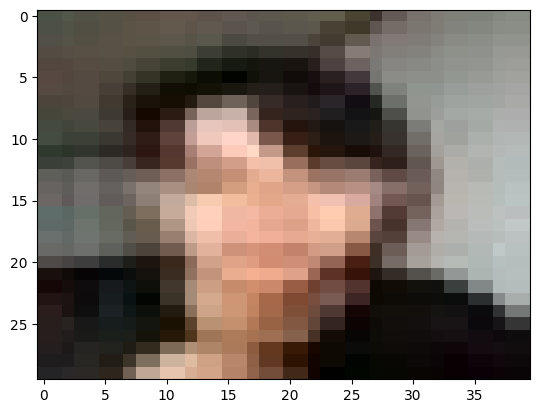

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/Colab Notebooks/hinhLop/Tri (51).jpg', target_size = (30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)

1/1 [==============================] - 0s 25ms/step


array([15])

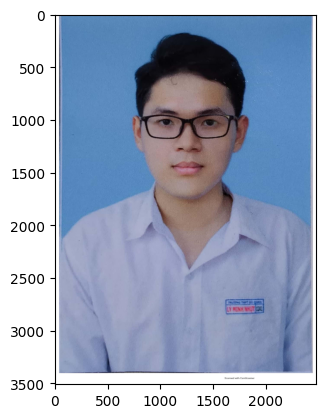

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

url = '/content/drive/MyDrive/4x6.jpg'
img = load_img(url)
plt.imshow(img)

img = load_img(url, target_size = (30,40))
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)